# <center><u>Multiple Regression</u></center>

 ![](_pic/img-Regression/MR1.png)

 ![](_pic/img-Regression/MR2.png)

In [4]:
import pandas as pd
df=pd.read_csv('_dataset/Dataset-Regression/50_Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df['State']=df.State.map({'California':0,'New York':1,'Florida':2})
df_f=df.iloc[:,:-1]
#df_f=pd.get_dummies(df_f)
X=df_f.values
df_f.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,2
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,2


In [6]:
Y=df.iloc[:,-1]
y=df.iloc[:,-1].values
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

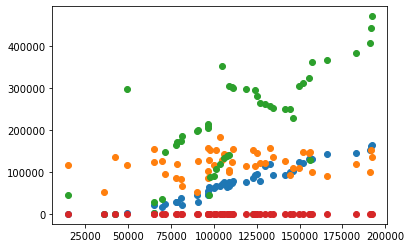

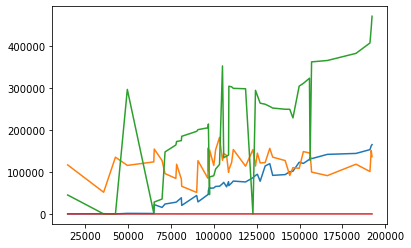

In [7]:
import matplotlib.pyplot as plt
feat_count = len(df_f.columns)
for a in range(feat_count):
    x=df_f.iloc[:,a].values.flatten()
    plt.scatter(Y,x,)
plt.show()
for a in range(feat_count):
    x=df_f.iloc[:,a].values.flatten()
    plt.plot(Y,x)
plt.show()

feat_count = len(df_f.columns)
for a in range(feat_count):
    df_f.iloc[:,a].values.flatten()
    

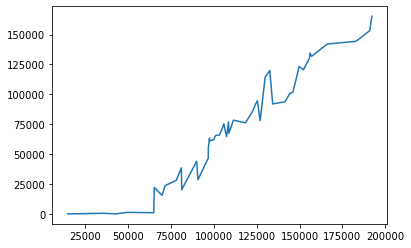

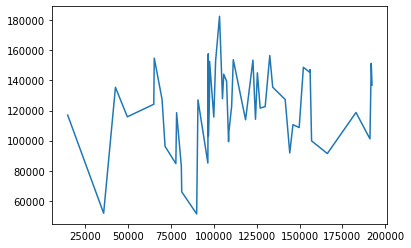

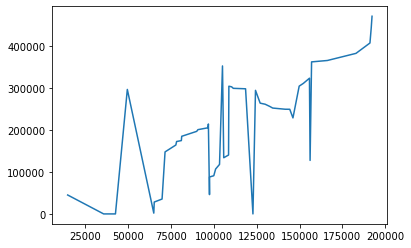

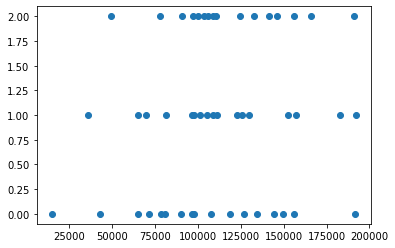

In [8]:
import matplotlib.pyplot as plt
feat_count = len(df_f.columns)

for a in range(feat_count-1):
    x=df_f.iloc[:,a].values.flatten()
    plt.plot(Y,x)
    plt.show()

x=df_f.iloc[:,-1].values.flatten()
plt.scatter(Y,x)
plt.show()
    

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [11]:
pred_train=reg.predict(X_train)
pred_test=reg.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_train,pred_train)

0.9506722394348468

In [13]:
r2_score(y_test,pred_test)

0.9440978109935928

In [14]:
def predY(X:list):
    feat_count = len(df_f.columns)  # Feature List Enter
    m=reg.coef_
    b=reg.intercept_
    backy=b
    feat_column_sum=list()
    for a in range(feat_count):
        backy=backy + m[a]*X[a]
    return backy

In [15]:
a=4
print(df_f.iloc[a].values)
print(y[a])
predY(df_f.iloc[a].values)


[1.4210734e+05 9.1391770e+04 3.6616842e+05 2.0000000e+00]
166187.94


173403.61533243812

In [16]:
predList=list()
for a in range(len(Y.index)):
    predList.append(predY(df_f.iloc[a].values))

In [17]:
#predList